In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 9.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.1 MB 7.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.0 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------- -------- 1.8/2.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.0 MB 9.4 MB/s eta 0:00:01
   -------------------- ------------------- 3.7/7.0 MB 9.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.0/7.0 MB 8.3 MB/s eta 0:00:01
   ------------------------------------

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df_houses = pd.read_csv('housing_price.csv')
df_houses.head()

,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,NaN
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,NaN,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,NaN,350000.0,2008.0,Yes


In [58]:
missing_values = df_houses.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 HouseID      0
Location     0
Size_sqft    2
Bedrooms     1
Bathrooms    1
Price        2
YearBuilt    2
Garage       3
dtype: int64


There are missing values in the dataset.


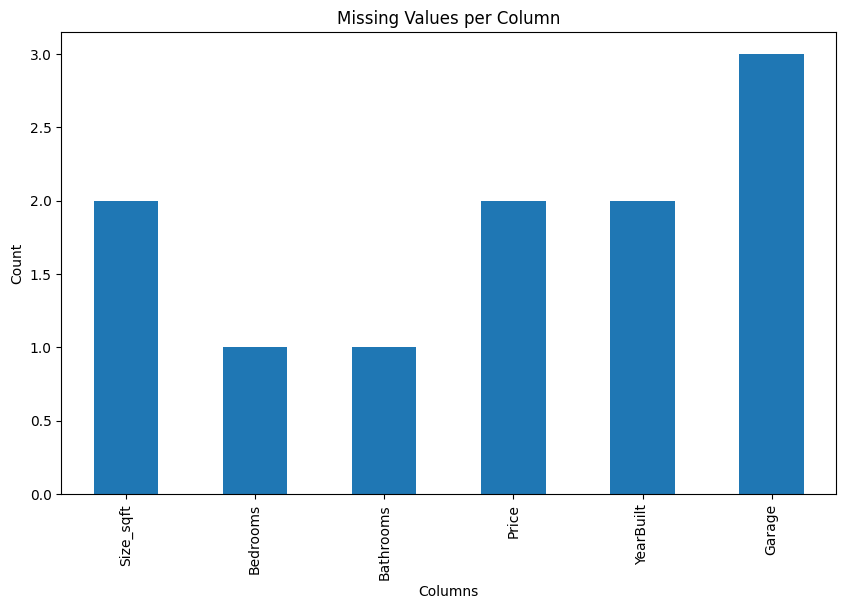

In [52]:
missing_values=missing_values[missing_values>0]
print("There are missing values in the dataset.")
missing_values.plot(kind='bar', figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.show()

In [60]:
num_cols = df_houses.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if df_houses[col].isnull().sum() > 0:
              median_value = df_houses[col].median()
              df_houses[col].fillna(median_value, inplace=True)
df_houses    

,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,NaN
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,1250.0,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,2.0,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,420000.0,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,2008.0,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,1250.0,4.0,3.0,420000.0,2012.0,NaN
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


In [62]:
cat_cols = df_houses.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df_houses[col].isnull().sum() > 0: 
              df_houses[col].fillna(df_houses[col].mode()[0], inplace=True)
df_houses

,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,Yes
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,1250.0,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,2.0,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,420000.0,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,2008.0,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,1250.0,4.0,3.0,420000.0,2012.0,Yes
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


In [63]:
threshold = len(df_houses) * 0.3
df_houses.dropna(axis=1, thresh=threshold, inplace=True)
df_houses

,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,Yes
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,1250.0,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,2.0,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,420000.0,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,2008.0,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,1250.0,4.0,3.0,420000.0,2012.0,Yes
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


In [64]:
df_houses.isnull().sum()

HouseID      0
Location     0
Size_sqft    0
Bedrooms     0
Bathrooms    0
Price        0
YearBuilt    0
Garage       0
dtype: int64

In [ ]:
raw_data=pd.read_csv('housing_price.csv')
print("before cleaning:")
raw_data



before cleaning:


,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,NaN
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,NaN,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,NaN,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,NaN,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,NaN,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,NaN,4.0,3.0,420000.0,2012.0,NaN
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


In [71]:
print("after cleaning:")
df_houses

after cleaning:


,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,Yes
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,1250.0,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,2.0,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,420000.0,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,2008.0,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,1250.0,4.0,3.0,420000.0,2012.0,Yes
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


In [77]:
df_houses.to_csv('housing_price_cleaned.csv', index=False)
df=pd.read_csv('housing_price_cleaned.csv')
df

,HouseID,Location,Size_sqft,Bedrooms,Bathrooms,Price,YearBuilt,Garage
0,1,New York,1200.0,3.0,2.0,450000.0,2005.0,Yes
1,2,Los Angeles,1500.0,4.0,3.0,650000.0,2010.0,Yes
2,3,Chicago,900.0,2.0,1.0,320000.0,1998.0,No
3,4,Houston,1250.0,3.0,2.0,280000.0,2002.0,Yes
4,5,Phoenix,1100.0,3.0,2.0,350000.0,2008.0,Yes
5,6,Philadelphia,1300.0,4.0,2.0,420000.0,2006.0,No
6,7,San Antonio,1000.0,2.0,1.0,240000.0,2008.0,No
7,8,San Diego,1400.0,3.0,2.0,580000.0,2015.0,Yes
8,9,Dallas,1250.0,4.0,3.0,420000.0,2012.0,Yes
9,10,San Jose,1600.0,4.0,3.0,720000.0,2018.0,Yes


# Data analysis on the medical appointment no shows dataset

In [99]:
medical_data=pd.read_csv('medical_apointment.csv')
medical_data


,AppointmentID,Gender,Age,Hypertension,Diabetes,Alcoholism,SMS_received,ScheduledDay,AppointmentDay,NoShow
0,1,F,25.0,0,0.0,0.0,1.0,2016-04-29,2016-04-29,No
1,2,M,34.0,1,0.0,0.0,0.0,2016-04-29,2016-04-29,Yes
2,3,F,45.0,1,1.0,0.0,1.0,2016-04-29,2016-04-30,No
3,4,F,29.0,0,0.0,0.0,1.0,2016-04-29,2016-04-30,No
4,5,M,60.0,1,1.0,1.0,0.0,2016-04-30,2016-05-02,Yes
5,6,F,41.0,0,0.0,0.0,1.0,2016-05-02,2016-05-03,No
6,7,M,50.0,1,0.0,0.0,0.0,2016-05-03,2016-05-03,Yes
7,8,F,22.0,0,0.0,0.0,1.0,2016-05-03,2016-05-04,No
8,9,M,38.0,0,1.0,0.0,0.0,2016-05-04,2016-05-04,Yes
9,10,F,NaN,1,0.0,0.0,1.0,2016-05-04,2016-05-05,No


In [100]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AppointmentID   15 non-null     int64  
 1   Gender          15 non-null     object 
 2   Age             13 non-null     float64
 3   Hypertension    15 non-null     int64  
 4   Diabetes        14 non-null     float64
 5   Alcoholism      14 non-null     float64
 6   SMS_received    14 non-null     float64
 7   ScheduledDay    14 non-null     object 
 8   AppointmentDay  15 non-null     object 
 9   NoShow          15 non-null     object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.3+ KB


In [101]:
miss_values=medical_data.isnull().sum()
print("Missing values in each column:\n", miss_values)

Missing values in each column:
 AppointmentID     0
Gender            0
Age               2
Hypertension      0
Diabetes          1
Alcoholism        1
SMS_received      1
ScheduledDay      1
AppointmentDay    0
NoShow            0
dtype: int64


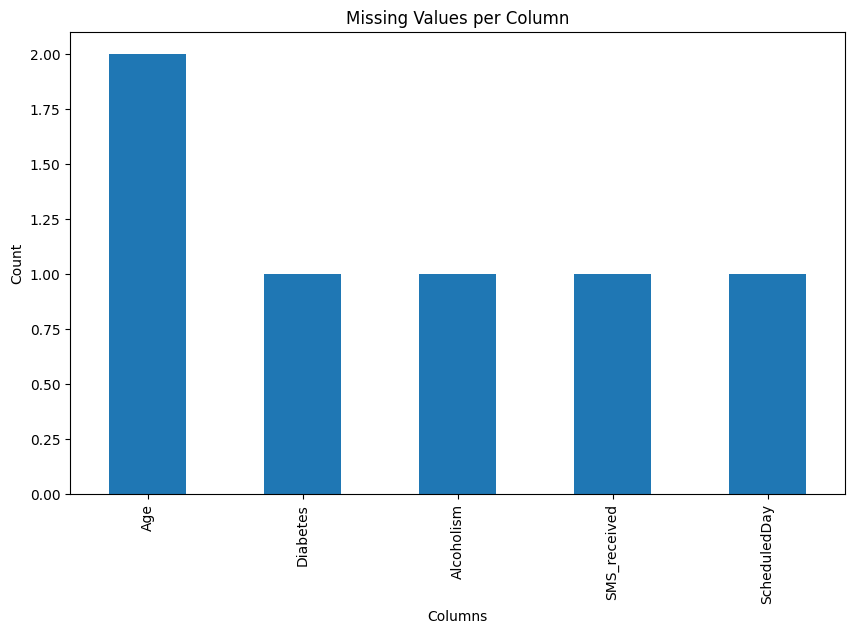

In [102]:
miss_values=miss_values[miss_values>0]
miss_values.plot(kind='bar', figsize=(10, 6))
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.show()

In [104]:
number_cols = medical_data.select_dtypes(include=['int64','float64']).columns
for col in number_cols:
    if medical_data[col].isnull().sum() > 0:
              median_value = medical_data[col].median()
              medical_data[col].fillna({col: median_value}, inplace=True)
medical_data

,AppointmentID,Gender,Age,Hypertension,Diabetes,Alcoholism,SMS_received,ScheduledDay,AppointmentDay,NoShow
0,1,F,25.0,0,0.0,0.0,1.0,2016-04-29,2016-04-29,No
1,2,M,34.0,1,0.0,0.0,0.0,2016-04-29,2016-04-29,Yes
2,3,F,45.0,1,1.0,0.0,1.0,2016-04-29,2016-04-30,No
3,4,F,29.0,0,0.0,0.0,1.0,2016-04-29,2016-04-30,No
4,5,M,60.0,1,1.0,1.0,0.0,2016-04-30,2016-05-02,Yes
5,6,F,41.0,0,0.0,0.0,1.0,2016-05-02,2016-05-03,No
6,7,M,50.0,1,0.0,0.0,0.0,2016-05-03,2016-05-03,Yes
7,8,F,22.0,0,0.0,0.0,1.0,2016-05-03,2016-05-04,No
8,9,M,38.0,0,1.0,0.0,0.0,2016-05-04,2016-05-04,Yes
9,10,F,40.0,1,0.0,0.0,1.0,2016-05-04,2016-05-05,No


In [106]:
catogorical_cols = medical_data.select_dtypes(include=['object']).columns
for col in catogorical_cols:
    if medical_data[col].isnull().sum() > 0: 
              medical_data[col].fillna({col: medical_data[col].mode()[0]}, inplace=True)
medical_data

,AppointmentID,Gender,Age,Hypertension,Diabetes,Alcoholism,SMS_received,ScheduledDay,AppointmentDay,NoShow
0,1,F,25.0,0,0.0,0.0,1.0,2016-04-29,2016-04-29,No
1,2,M,34.0,1,0.0,0.0,0.0,2016-04-29,2016-04-29,Yes
2,3,F,45.0,1,1.0,0.0,1.0,2016-04-29,2016-04-30,No
3,4,F,29.0,0,0.0,0.0,1.0,2016-04-29,2016-04-30,No
4,5,M,60.0,1,1.0,1.0,0.0,2016-04-30,2016-05-02,Yes
5,6,F,41.0,0,0.0,0.0,1.0,2016-05-02,2016-05-03,No
6,7,M,50.0,1,0.0,0.0,0.0,2016-05-03,2016-05-03,Yes
7,8,F,22.0,0,0.0,0.0,1.0,2016-05-03,2016-05-04,No
8,9,M,38.0,0,1.0,0.0,0.0,2016-05-04,2016-05-04,Yes
9,10,F,40.0,1,0.0,0.0,1.0,2016-05-04,2016-05-05,No


In [108]:
threshold = len(medical_data) * 0.3
medical_data.dropna(axis=1, thresh=threshold, inplace=True)
medical_data

,AppointmentID,Gender,Age,Hypertension,Diabetes,Alcoholism,SMS_received,ScheduledDay,AppointmentDay,NoShow
0,1,F,25.0,0,0.0,0.0,1.0,2016-04-29,2016-04-29,No
1,2,M,34.0,1,0.0,0.0,0.0,2016-04-29,2016-04-29,Yes
2,3,F,45.0,1,1.0,0.0,1.0,2016-04-29,2016-04-30,No
3,4,F,29.0,0,0.0,0.0,1.0,2016-04-29,2016-04-30,No
4,5,M,60.0,1,1.0,1.0,0.0,2016-04-30,2016-05-02,Yes
5,6,F,41.0,0,0.0,0.0,1.0,2016-05-02,2016-05-03,No
6,7,M,50.0,1,0.0,0.0,0.0,2016-05-03,2016-05-03,Yes
7,8,F,22.0,0,0.0,0.0,1.0,2016-05-03,2016-05-04,No
8,9,M,38.0,0,1.0,0.0,0.0,2016-05-04,2016-05-04,Yes
9,10,F,40.0,1,0.0,0.0,1.0,2016-05-04,2016-05-05,No


In [109]:
medical_data.isnull().sum()

AppointmentID     0
Gender            0
Age               0
Hypertension      0
Diabetes          0
Alcoholism        0
SMS_received      0
ScheduledDay      0
AppointmentDay    0
NoShow            0
dtype: int64

In [116]:
raw_data2=pd.read_csv('medical_apointment.csv')
print("before cleaning:")
raw_data2.shape

before cleaning:


(15, 10)

In [117]:
print("after cleaning:")
medical_data.shape

after cleaning:


(15, 10)

In [114]:
medical_data.to_csv('medical_appointment_cleaned.csv', index=False)
md=pd.read_csv('medical_appointment_cleaned.csv')
md  

,AppointmentID,Gender,Age,Hypertension,Diabetes,Alcoholism,SMS_received,ScheduledDay,AppointmentDay,NoShow
0,1,F,25.0,0,0.0,0.0,1.0,2016-04-29,2016-04-29,No
1,2,M,34.0,1,0.0,0.0,0.0,2016-04-29,2016-04-29,Yes
2,3,F,45.0,1,1.0,0.0,1.0,2016-04-29,2016-04-30,No
3,4,F,29.0,0,0.0,0.0,1.0,2016-04-29,2016-04-30,No
4,5,M,60.0,1,1.0,1.0,0.0,2016-04-30,2016-05-02,Yes
5,6,F,41.0,0,0.0,0.0,1.0,2016-05-02,2016-05-03,No
6,7,M,50.0,1,0.0,0.0,0.0,2016-05-03,2016-05-03,Yes
7,8,F,22.0,0,0.0,0.0,1.0,2016-05-03,2016-05-04,No
8,9,M,38.0,0,1.0,0.0,0.0,2016-05-04,2016-05-04,Yes
9,10,F,40.0,1,0.0,0.0,1.0,2016-05-04,2016-05-05,No
